<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:#CFE8FF;      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">

  <!-- logo sin cambios -->
  <img src="data/imgs/logo.png" align="right" width="200" alt="Logo">

  <!-- Datathon sin cambios -->
  <font color="#1874CD"><h1 align="left" style="margin-top:0;"><b>Datathon PDS06</b></h1></font>

  <!-- Resto en azul oscuro -->
  <h2 align="left" style="color:#003366;margin:0;"><b>Christian Esteve Orts</b></h2>
  <h3 align="left" style="color:#003366;margin:0;">Notebook: regresión lineal</h3>
</div>

<hr>


El ejercicio consta de un problema de regresión, siendo la última columna el target y el resto las potenciales variables predictoras.


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Librerías</b></h2>
</div>

In [265]:
# Gestión de la estrucutra de los datos
import pandas as pd
import numpy as np

# Gestión de ruta al dataset, por si se necesita cambiar en un futuro a una base de datos o servicio en la nube
from pathlib import Path

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
# Para test normalidad y distribución normal
from scipy import stats  # Para test de normalidad saphiro-wilk

# Para dividir el dataset en train y test
from sklearn.model_selection import train_test_split

#Preprocesado de datos
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox, yeojohnson


# Statsmodels. Para poder usar notación de fórmula y notación de sklearn
import statsmodels.api as sm

# Para test homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan

# Para test colinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Importación del dataset y comprobación rápida</b></h2>
</div>


In [266]:

DATA_PATH = Path("data/train.xlsx")  # cámbialo aquí si hace falta
df = pd.read_excel(DATA_PATH)
print(f"Número de observaciones y columnas: {df.shape}")
df.head(10)

Número de observaciones y columnas: (772, 11)


x1      x2        x3      x4     x5       x6      x7    x8  \
0   27585.8881    0.00  2.215558  176.46   4.49  1058.60  780.09  28.0   
1   45693.3376   98.06  1.406881     NaN   6.65  1066.00  785.52   NaN   
2  110889.0000    0.00  0.000000  192.00    NaN   931.20  842.60   7.0   
3  241081.0000   26.00  2.093422  210.00   3.93   882.00  699.00  28.0   
4   34670.4400  124.10  0.000000  185.70   0.00  1083.40     NaN  28.0   
5          NaN     NaN       NaN  221.40  10.50   819.20  778.40  28.0   
6   62500.0000    0.00  1.985382  187.42    NaN   956.86  861.17   3.0   
7  133956.0000  187.00  0.000000  191.30   6.60   824.30  756.90   NaN   
8   99225.0000  137.00  0.000000  145.00   5.90  1130.00     NaN  28.0   
9   98156.8900  262.20  0.000000  175.50   8.60  1046.90  611.80   3.0   

         x9       x10    deseada  
0 -1.867265  0.900023  21.539230  
1  0.633919  0.862797  17.836744  
2 -0.203045  0.461557  23.404952  
3 -1.382800  0.338268  55.551081  
4 -0.510016  0.603488  17.596806  
5 -1.280304  0.634104  31.420111  
6  0.404982  0.404319  13.817099  
7       NaN  0.071008  65.909079  
8 -0.599393  0.239180  81.751169  
9  1.538037       NaN  28.799413

Comprobación rápida de datos faltantes


In [267]:
# NAs
df.isna().sum().sum()

np.int64(774)

Se puede observar de forma rápida que el dataset tiene datos faltantes


In [268]:
# Obtenemos algunos estadísticos para ver la estructura de los datos para situar los datos faltantes
print(f"Recordar el número de observaciones: {df.shape[0]}")

# T es para transponer la matriz y mejorar la legibilidad
display(df.describe().T)

Recordar el número de observaciones: 772


count          mean           std           min           25%  \
x1       706.0  92761.097733  68338.519818  10404.000000  37900.302400   
x2       685.0     72.037898     86.135309      0.000000      0.000000   
x3       703.0      0.882659      1.026148      0.000000      0.000000   
x4       690.0    181.944594     21.474526    121.750000    164.925000   
x5       698.0      6.168636      6.033556      0.000000      0.000000   
x6       704.0    971.787997     79.482087    801.000000    932.000000   
x7       699.0    772.917167     81.459988    594.000000    725.950000   
x8       687.0     45.914119     62.163402      1.000000     14.000000   
x9       694.0      0.018116      0.979987     -3.241267     -0.651777   
x10      680.0      0.496178      0.287545      0.005230      0.248967   
deseada  772.0     35.895710     16.786940      2.331808     23.742796   

                  50%            75%            max  
x1       76729.000000  131478.760000  291600.000000  
x2          20.000000     141.300000     359.400000  
x3           0.000000       2.073865       2.292256  
x4         185.700000     192.000000     247.000000  
x5           6.000000      10.100000      32.200000  
x6         967.040000    1034.250000    1145.000000  
x7         779.700000     824.000000     992.600000  
x8          28.000000      56.000000     365.000000  
x9           0.046709       0.654966       2.720169  
x10          0.497494       0.731890       0.998348  
deseada     34.222141      45.865322      82.599225

Comparando la columna [mean] con el 50% las variables x4,x6, x7 y x10 parecen tener las mejores distribuciones. También la deseada.


Si comparamos el total de registros [count] de la columna target "deseada" con las variables predictoras, se puede comprobar que hay datos faltantes en todas las variables.


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Análisis exploratorio de los datos</b></h2>
</div>


### Gráfico de distribución para cada variable numérica


Text(0.5, 0.98, 'Distribución de variables numéricas')

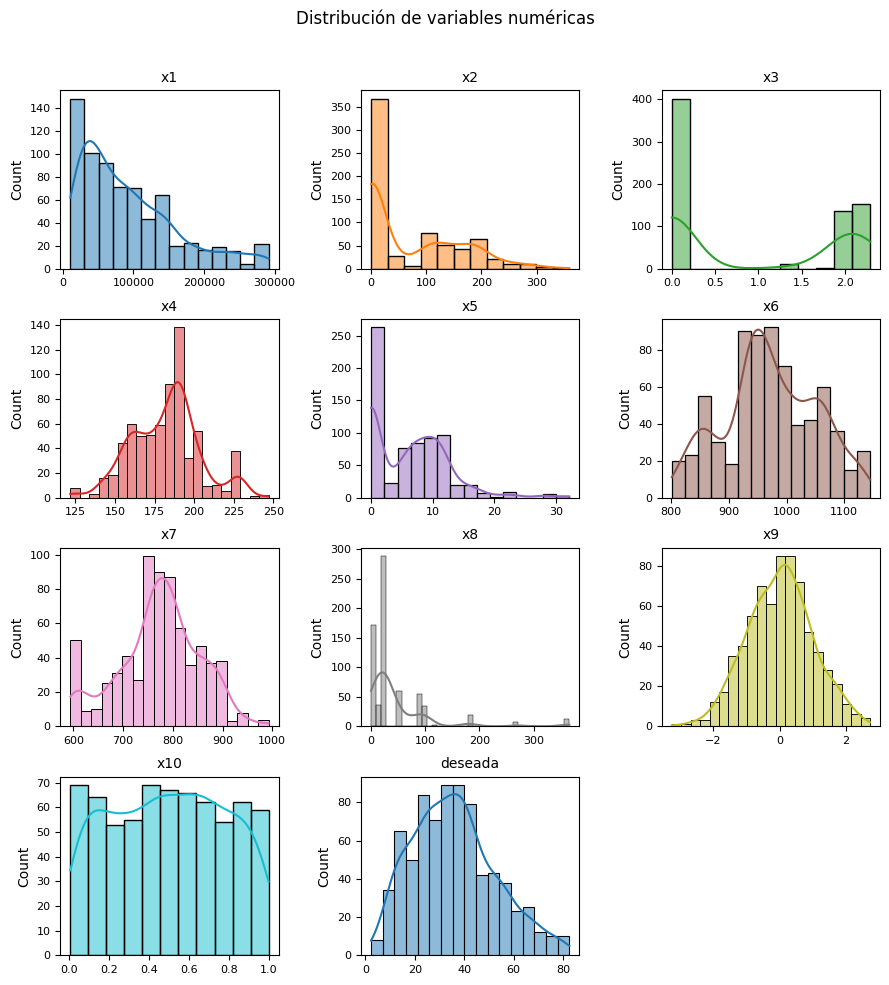

In [269]:
# Repasar los comentarios del código y cambiarlos a mejoras expositivas

import math  # Para calcular el número de filas necesarias


# --- Selección de variables y dimensionado del lienzo ---

columnas_numeric = df.select_dtypes(include=np.number).columns
n_vars = len(columnas_numeric)
if n_vars == 0:
    raise ValueError("El DataFrame no contiene columnas numéricas.")

# Máximo de columnas de subplots por fila (ajustable cambiando esta variable)
ncols = 3
# Filas necesarias para cubrir todas las variables
nrows = math.ceil(n_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(3*ncols, 2.5*nrows))

# Convertir a array 1D para indexar sin errores, incluso si hay una sola fila/columna
axes = np.atleast_1d(axes).ravel()

# Paleta de colores (rotará si hay más variables que colores)
palette = sns.color_palette(n_colors=max(n_vars, 6))

# --- Bucle de trazado: un histograma por variable numérica ---
for i, col in enumerate(columnas_numeric):
    ax = axes[i]
    sns.histplot(
        data=df, x=col, stat="count", kde=True,
        color=palette[i % len(palette)], ax=ax
    )
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.set_xlabel("")

# --- Ocultar ejes no usados (si la rejilla quedó más grande de lo necesario) ---
for ax in axes[n_vars:]:
    ax.set_visible(False)

# --- Ajustes finales de maquetación ---
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables numéricas', fontsize=12)

Según las gráficas , las variables x4, x6, x7 y x9 tienen las mejores distribuciones. La columna a predecir [deseada] tiene una buena distribución.


### Test de Saphiro

Para


In [270]:
# Normalidad en la variable respuesta "deseada"

shapiro_test = stats.shapiro(df["deseada"])
print(
    f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

Test Shapiro-Wilk: estadístico = 0.977448345500092, p-value = 1.538592711759505e-09


El test Shapiro-Wilk contrasta la hipótesis nula de distribución normal de los datos. La variable respuesta [deseada] obtenemos un p-valor superior a 0,05 (nivel de confianza de un 95%) y, por lo tanto, podemos aceptar la hipótesis nula y asumir que la distrubución es normal.


### Correlaciones


Generamos la matriz directamente, ya que la visualización es mejor.


<Axes: >

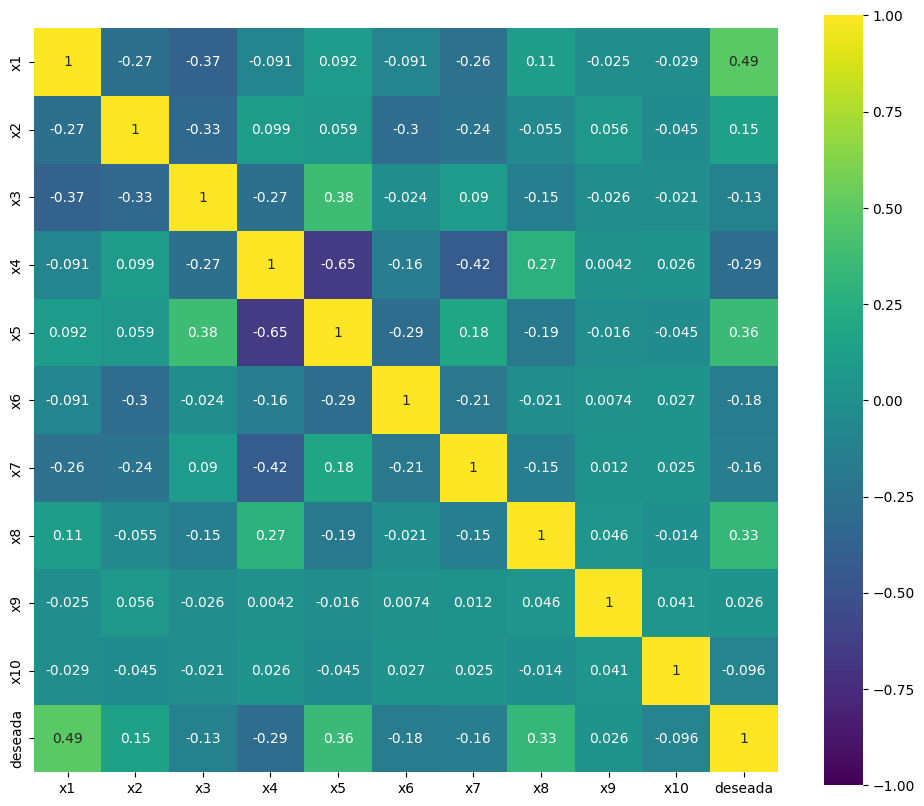

In [271]:
# Matriz de correlaciones entre variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),
            cmap="viridis",
            vmin=-1, vmax=1,  # Evitamos el cálculo automático de los límites
            annot=True,
            cbar=True,
            square=True)

Conclusión: x1 es el predictor lineal más potente; x5, x8 y x4 (con signo opuesto) aportan información adicional. El resto apenas correlaciona linealmente con la respuesta.

La matriz revela que x1 es el predictor lineal dominante (ρ ≈ 0.49) seguido de x5 y x8; x4 ejerce un efecto inverso (ρ ≈ -0.29).

La única colinealidad preocupante es el fuerte anticorrelación x4-x5 (-0.65). Por ello, vigilaré VIF o usaré regularización para evitar inestabilidad en un modelo lineal. En cambio, un modelo basado en árboles manejaría bien estas correlaciones moderadas.


### Distribución de cada variable enfrentada al resto


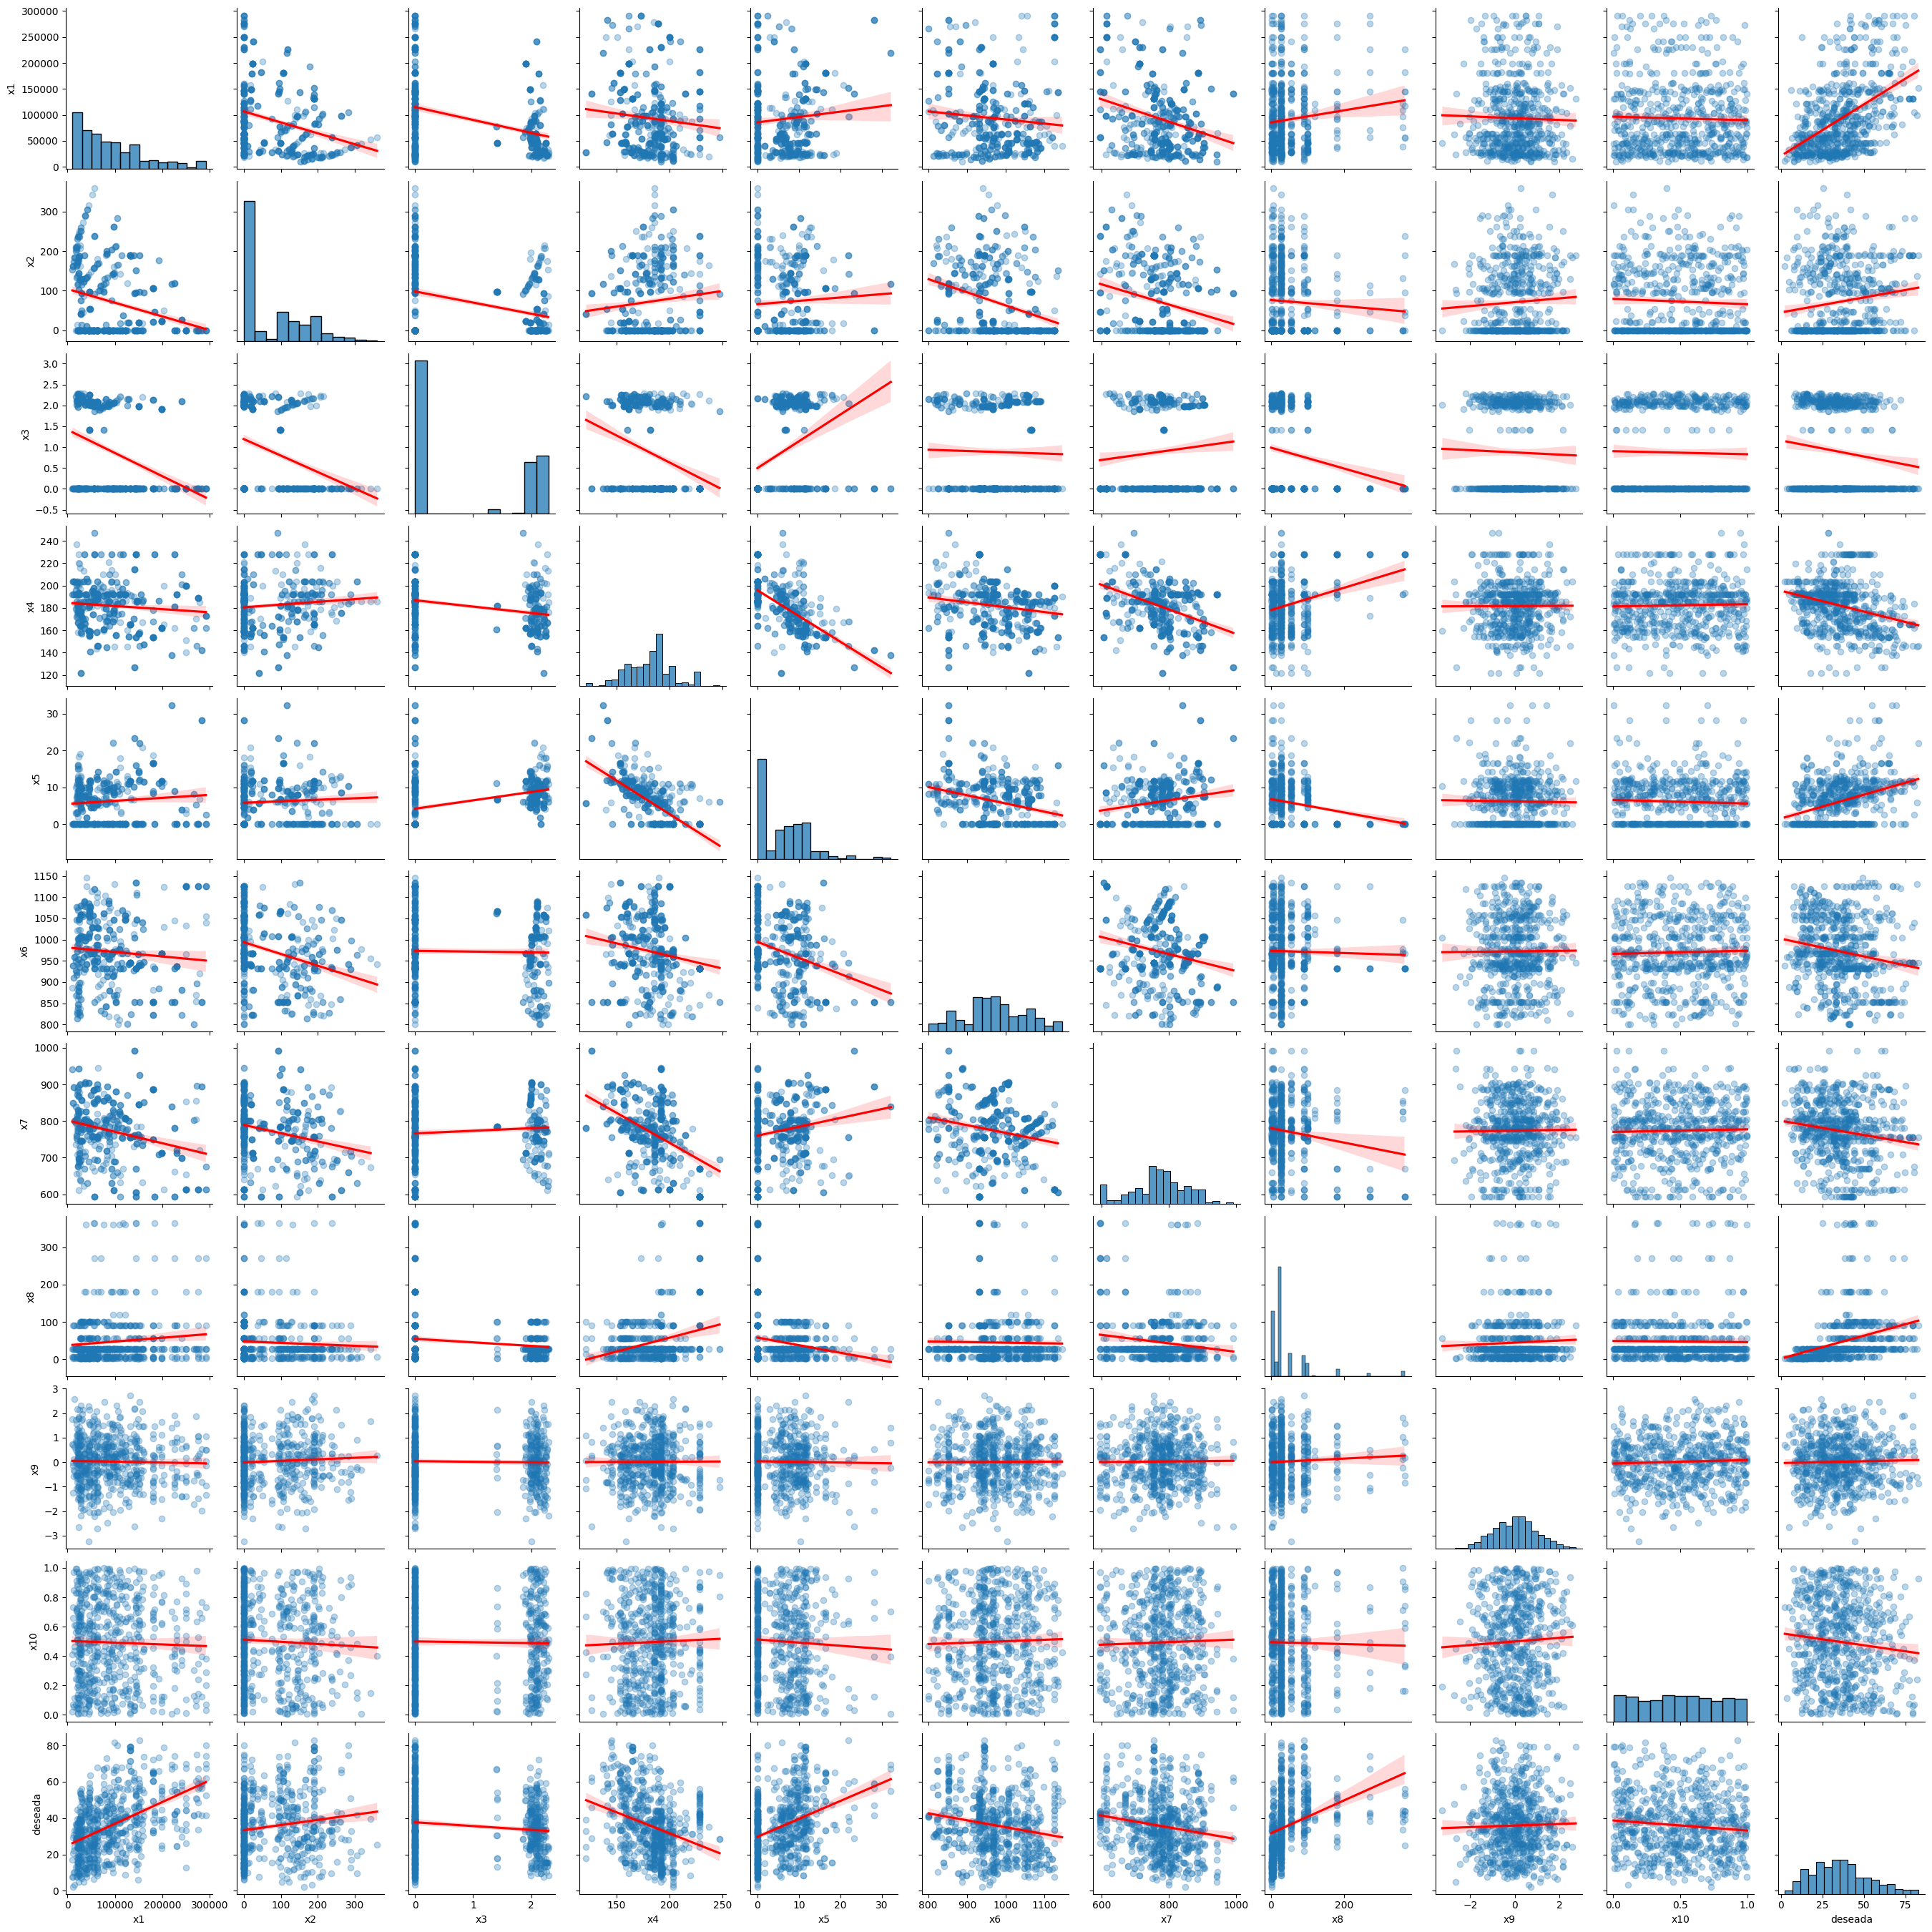

In [272]:


# Distribución de cada variable enfrentada al resto
sns.pairplot(df, kind="reg",
             plot_kws={"line_kws": {"color": "red"},
                       "scatter_kws": {"alpha": 0.3}})

plt.show()

Tendencias lineales claras con el target: x1, x5, x8 (positivas) x4 (negativa). Refuerza lo se ve en la matriz de correlación: serán los predictores más prometedores.

Relación negativa marcada entre predictores x4 ↔ x5 Evidencia visual de su colinealidad moderada (r ≈ −0,65). Conviene monitorizar VIF o usar regularización.

Escalas muy dispares, por ejemplo x1 y x9. Será necesario la normalización de las variables predictoras.

Las distribucuines de cola pesada de x1 (potancialmente el predictor principal), x2 y x5 son susceptibles de necesitar transformación por BosCox o Yeo-Johnson.

x9 y, en menor medida, x10 (todas las dispersión–[deseada] son nubes sin patrón)

x3 es pobre en colinealidad y presenta una gran cantidad de valores en 0, por lo que es candidata a excluirse.



### Conclusiones para transformaciones de las variables

x1
Vacíos: 8,55 %. Imputación: mediana. No tocar ceros (no hay).

Transformación: Box-Cox (todos > 0, asimetría derecha moderada ~1.10).

Descartar: No (r con objetivo ≈ +0,49).

x2
Vacíos: 11,27 %. Imputación: mediana.
Ceros: 41,3 % (valor real, mantener).

Transformación: Yeo-Johnson (admite 0), asimetría ~0,84.
(Opcional y recomendable: añadir x2_bin=(x2>0) para capturar “presencia/ausencia”).*

Descartar: No por ahora (r ≈ +0,15).

x3
Vacíos: 8,94 %. Imputación: mediana.
Ceros: 52,1 % (exceso de ceros, mantener como valor real).

Transformación: Yeo-Johnson.
(Opcional recomendable: x3_bin=(x3>0); mejora linealidad al separar presencia/magnitud).

Descartar: No (aunque r es baja ≈ −0,13, puede aportar combinado).

x4
Vacíos: 10,62 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (distribución casi simétrica, rango acotado).

Descartar: No (r ≈ −0,29).

x5
Vacíos: 9,59 %. Imputación: mediana.
Ceros: 33,4 % (mantener).

Transformación: Yeo-Johnson (asimetría ~0,96).
(Opcional recomendable: x5_bin=(x5>0)).

Descartar: No (r ≈ +0,36).

x6
Vacíos: 8,81 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (distribución casi simétrica).

Descartar: No (r ≈ −0,18).

x7
Vacíos: 9,46 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (ligera asimetría izquierda).

Descartar: No (r ≈ −0,16).

x8
Vacíos: 11,01 %. Imputación: mediana. Ceros: 0. Mín=1.

Transformación: Box-Cox (asimetría fuerte ~3,26; todos > 0).

Descartar: No (r ≈ +0,33).

x9
Vacíos: 10,10 %. Imputación: mediana. Puede ser ya estandarizada (μ≈0).

Transformación: Ninguna / YJ innecesario (hay negativos, pero distribución ya casi simétrica).

Descartar: Sí, de entrada (r ≈ +0,03, señal prácticamente nula en un modelo lineal sin interacciones). Si luego usamos regularización, se puede re-evaluar.

x10
Vacíos: 11,92 %. Imputación: mediana. Ceros verdaderos: no (mín ~0,005).

Transformación: Ninguna (0–1 casi simétrica).

Descartar: No (r ≈ −0,10; débil pero puede sumar un poco).

<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>División del dataset</b></h2>
</div>


In [273]:
# División en entrenamiento y test
# df_train, df_test = train_test_split(
#    df, test_size=0.2, random_state=42, shuffle=True)

df_train=df.copy()  # Asignación directa para evitar errores de referencia

# Ahora dividimos en X e y
# Dataframe entrenamiento con la variable respuesta
y_train = df_train["deseada"]
# y_test = df_test["deseada"]  # Dataframe test con la variable respuesta

# Dataframe entrenamiento con las variables predictoras
X_train = df_train.drop("deseada", axis=1)
# Dataframe test con las variables predictoras
# X_test = df_test.drop("deseada", axis=1)

In [274]:
# Comprobamos dimensiones
print(f"Dimensiones train: {X_train.shape}.")
# print(f"Dimensiones test: {X_test.shape}.")

Dimensiones train: (772, 10).


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Transformación de los datos</b></h2>
</div>


In [275]:
#importacion de la funcion de transformación
from Transformacion import FitTransformColumn

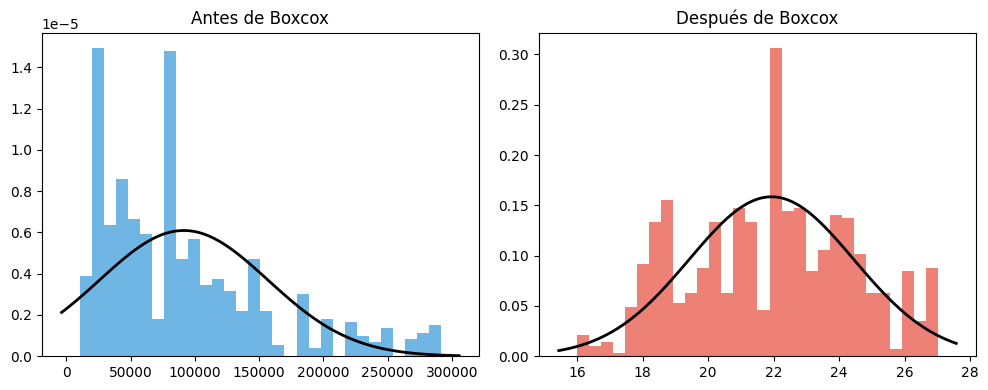

Transformación de x1: lambda = 0.1092
Primeros 5 registros de x1 transformado:
[18.81319807 20.39787608 23.40238481 26.284129   19.52017705]


In [276]:
# Transformación para x1
#Vacíos: 8,55 %. Imputación: mediana.

x1 = X_train['x1']
x1_median = float(x1.median())
x1_imputed = x1.fillna(x1_median)

#Transformación: Box-Cox (todos > 0).
x1_transformed, x1_lambda = FitTransformColumn(x1_imputed, method='boxcox')

print (f"Transformación de x1: lambda = {x1_lambda:.4f}")

# ver los 5 primeros registros de x1_transformed
print("Primeros 5 registros de x1 transformado:")
print(x1_transformed[:5]) 



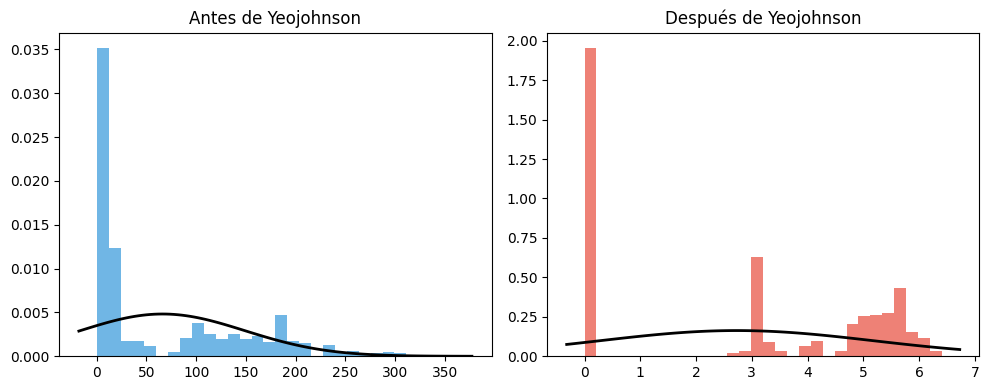

Transformación de x2: lambda = 0.0285
Primeros 5 registros de x2 transformado:
[0.         4.91012414 0.         3.45551366 5.17704282]


In [277]:
# Transformación para x2

# Vacíos: 11,27 %. Imputación: mediana.
# Ceros: 41,3 % (valor real, mantener).

x2 = X_train['x2']
x2_median = float(x2.median())
x2_imputed = x2.fillna(x2_median)

# Transformación: Yeo-Johnson (admite 0).
x2_transformed, x2_lambda = FitTransformColumn(x2_imputed, method='yeojohnson')

print (f"Transformación de x2: lambda = {x2_lambda:.4f}")

# ver los 5 primeros registros de x2_trnasformed
print("Primeros 5 registros de x2 transformado:")
print(x2_transformed[:5]) 




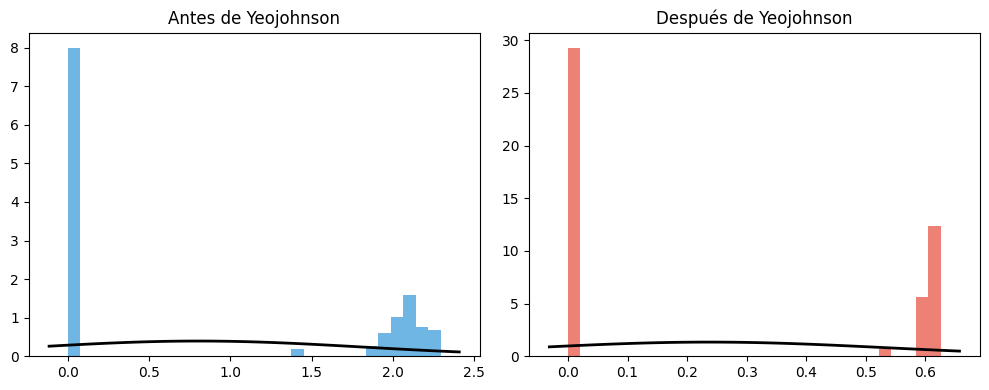

Transformación de x3: lambda = -1.2271
Primeros 5 registros de x3 transformado:
[0.62055294 0.53758059 0.         0.6110929  0.        ]


In [278]:
#Transformación para x3

#Vacíos: 8,94 %. Imputación: mediana.

x3 = X_train['x3']
x3_median = float(x3.median())
x3_imputed = x3.fillna(x3_median)

# Ceros: 52,1 % (exceso de ceros, mantener como valor real).

#Transformación: Yeo-Johnson.

x3_transformed, x3_lambda = FitTransformColumn(x3_imputed, method='yeojohnson')

print (f"Transformación de x3: lambda = {x3_lambda:.4f}")

# ver los 5 primeros registros de x3_trnasformed
print("Primeros 5 registros de x3 transformado:")
print(x3_transformed[:5]) 

Text(0.5, 0, 'Valor')

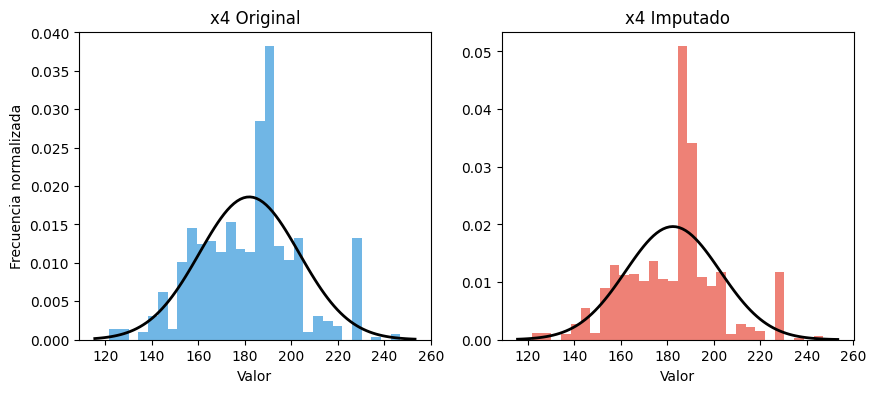

In [279]:
#transformación para x4

#Vacíos: 10,62 %. Imputación: mediana. Ceros: 0.

x4 = X_train['x4']
x4_median = float(x4.median())
x4_imputed = x4.fillna(x4_median)

#Transformación: Ninguna (distribución casi simétrica, rango acotado).

# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x4 original ---
axes[0].hist(x4, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x4), np.std(x4))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x4 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')

# --- Histograma x4 imputado ---
axes[1].hist(x4_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x4_imputed), np.std(x4_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x4 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')


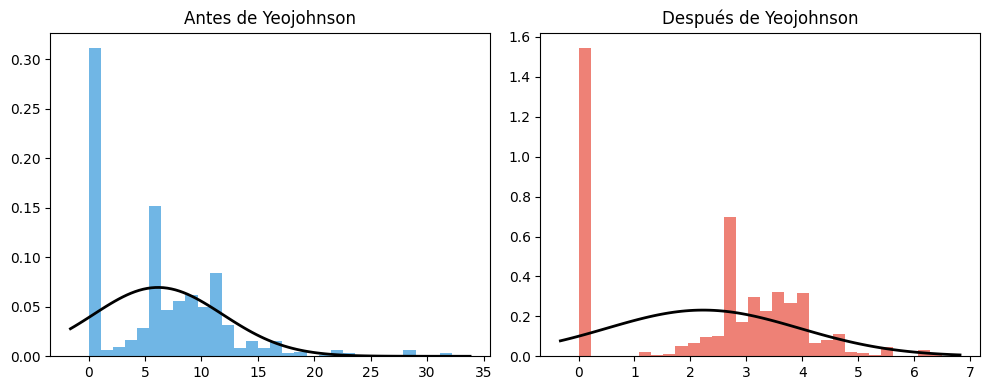

Transformación de x5: lambda = 0.3227
Primeros 5 registros de x5 transformado:
[2.26980246 2.87651726 2.70772049 2.08660027 0.        ]


In [280]:
# Vacíos: 9,59 %. Imputación: mediana.

x5 = X_train['x5']
x5_missing = int(x5.isna().sum())
x5_zeros = int((x5 == 0).sum())
x5_median = float(x5.median())

# Imputación
x5_imputed = x5.fillna(x5_median)

# Ceros: 33,4 % (mantener).

# Transformación: Yeo-Johnson (asimetría ~0,96).
x5_transformed, x5_lambda = FitTransformColumn(x5_imputed, method='yeojohnson')

print (f"Transformación de x5: lambda = {x5_lambda:.4f}")

# ver los 5 primeros registros de x5_trnasformed
print("Primeros 5 registros de x5 transformado:")
print(x5_transformed[:5]) 



Text(0.5, 0, 'Valor')

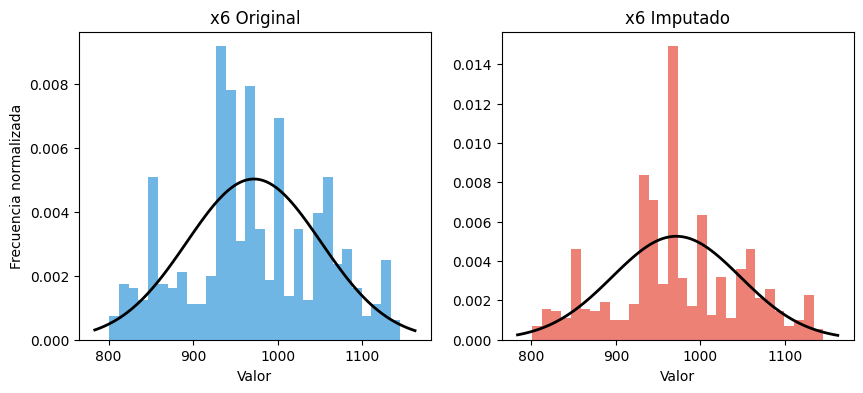

In [281]:
# Transformación para x6
#Vacíos: 8,81 %. Imputación: mediana. Ceros: 0.
x6 = X_train['x6']
x6_median = float(x6.median())
x6_imputed = x6.fillna(x6_median)

# Transformación: Ninguna (distribución casi simétrica).


# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x6 original ---
axes[0].hist(x6, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x6), np.std(x6))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x6 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')

# --- Histograma x6 imputado ---
axes[1].hist(x6_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x6_imputed), np.std(x6_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x6 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')



Text(0.5, 0, 'Valor')

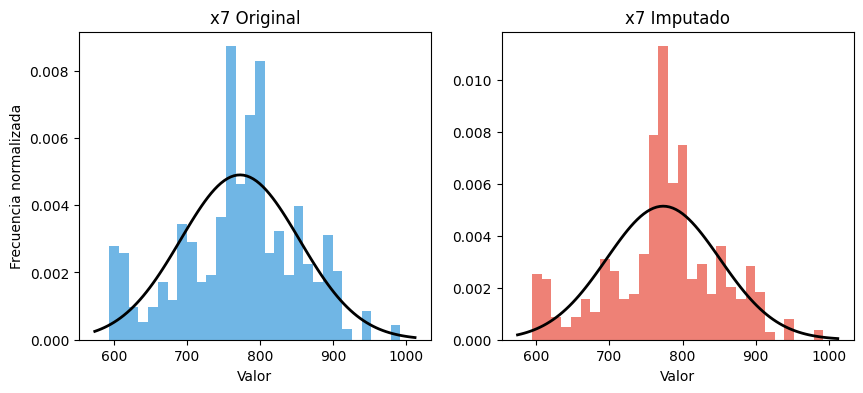

In [282]:
# Transformación para x7
#Vacíos: 9,46 %. Imputación: mediana. Ceros: 0.
x7 = X_train['x7']
x7_median = float(x7.median())
x7_imputed = x7.fillna(x7_median)


#Transformación: Ninguna (ligera asimetría izquierda).

# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x7 original ---
axes[0].hist(x7, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x7), np.std(x7))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x7 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')

# --- Histograma x7 imputado ---
axes[1].hist(x7_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x7_imputed), np.std(x7_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x7 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')


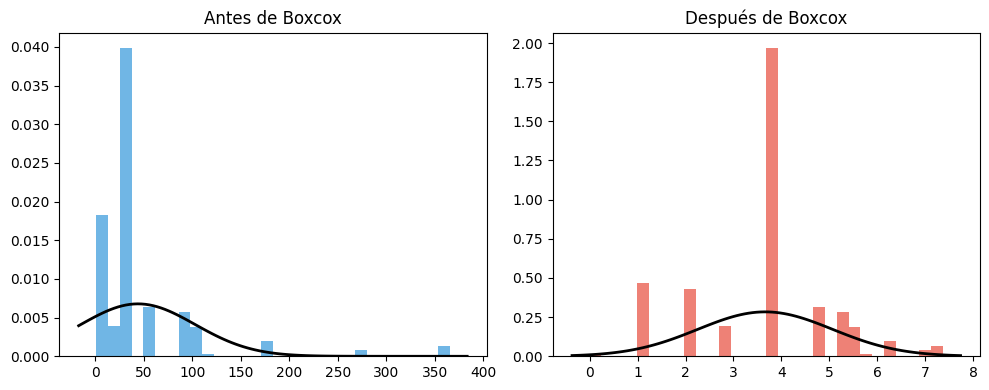

Transformación de x8: lambda = 0.0728
Primeros 5 registros de x8 transformado:
[3.77129772 3.77129772 2.09053735 3.77129772 3.77129772]


In [283]:
# Transformación para x8
#Vacíos: 11,01 %. Imputación: mediana. Ceros: 0.
x8 = X_train['x8']
x8_missing = int(x8.isna().sum())
x8_median = float(x8.median())
x8_imputed = x8.fillna(x8_median)

#Transformación: Box-Cox (asimetría fuerte ~3,26; todos > 0).
x8_transformed, x8_lambda = FitTransformColumn(x8_imputed, method='boxcox')


print (f"Transformación de x8: lambda = {x8_lambda:.4f}")

# ver los 5 primeros registros de x8_trnasformed
print("Primeros 5 registros de x8 transformado:")
print(x8_transformed[:5]) 



In [284]:
# Transformación para x9
#Vacíos: 10,10 %. Imputación: mediana.
x9 = X_train['x9']
x9_missing = int(x9.isna().sum())
x9_median = float(x9.median())
x9_imputed = x9.fillna(x9_median)

# Transformación: Ninguna / YJ innecesario (hay negativos, pero distribución ya casi simétrica).

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;"> Descartar x9: Sí, de entrada (r ≈ +0,03, señal prácticamente nula en un modelo lineal sin interacciones).
</div> 

Text(0.5, 0, 'Valor')

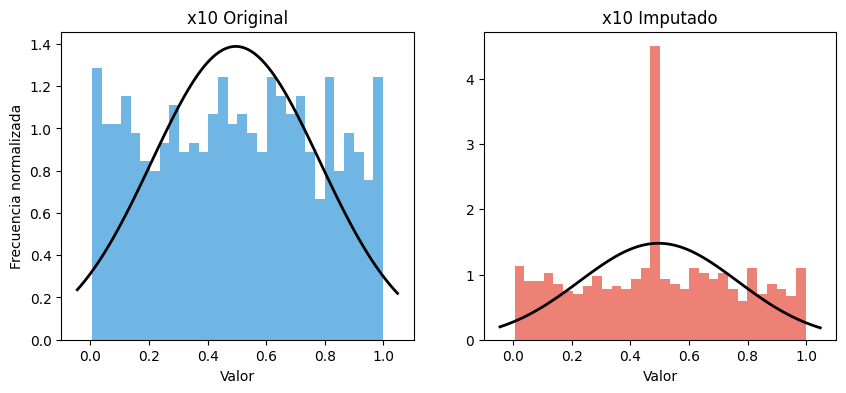

In [285]:
# Transformacion para x10
#Vacíos: 11,92 %. Imputación: mediana.
x10 = X_train['x10']
x10_missing = int(x10.isna().sum())
x10_median = float(x10.median())
x10_imputed = x10.fillna(x10_median)

# Transformación: Ninguna (0–1 casi simétrica).

# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x10 original ---
axes[0].hist(x10, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x10), np.std(x10))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x10 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')
# --- Histograma x10 imputado ---
axes[1].hist(x10_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x10_imputed), np.std(x10_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x10 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Creación de diferentes escenarios de dataframe para la prueba de los modelos. </b></h2>
<h4align="left" style="color:#003366;margin:0;"><b>Ante los resultados del análiss exploratorio de los datos, es probable que los modelos basados en árbles sean la mejor opción, por lo que se van a crear difenres escenarios de dataset que acoplen mejor en cada tipo de modelo a probar y evaluar cuál es el que mejor resultaod ofrece.<b><h4>
</div>


### Ensamble de un dataframe que será x_train_t con los datos transformados para entrenamiento

In [286]:
# Ensambla el DataFrame transformado de TRAIN (sin x9)
X_train_t = pd.DataFrame({
    'x1':  pd.Series(x1_transformed, index=X_train.index, name='x1'),
    'x2':  pd.Series(x2_transformed, index=X_train.index, name='x2'),
    'x3':  pd.Series(x3_transformed, index=X_train.index, name='x3'),
    'x4':  x4_imputed,
    'x5':  pd.Series(x5_transformed, index=X_train.index, name='x5'),
    'x6':  x6_imputed,
    'x7':  x7_imputed,
    'x8':  pd.Series(x8_transformed, index=X_train.index, name='x8'),
    # 'x9':  ...  # descartada por baja correlación
    'x10': x10_imputed,
})
X_train_t = X_train_t[['x1','x2','x3','x4','x5','x6','x7','x8','x10']]  # orden limpio

print(X_train_t.shape, X_train_t.columns.tolist())

(772, 9) ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x10']


### Aplicación de los lambda y medias en el dataframe de x_test, creando un nuevo dataframe x_test_t

In [287]:
def apply_boxcox(series, median, lam):
    s = series.fillna(median).astype(float).to_numpy()
    return pd.Series(boxcox(s, lmbda=lam), index=series.index, name=series.name)

def apply_yeojohnson(series, median, lam):
    s = series.fillna(median).astype(float).to_numpy()
    return pd.Series(yeojohnson(s, lmbda=lam), index=series.index, name=series.name)

# Construye TEST transformado usando tus medianas y lambdas de TRAIN (sin recomputar nada)
# X_test_t = pd.DataFrame({
#     'x1':  apply_boxcox(    X_test['x1'],  x1_median,  x1_lambda),
#     'x2':  apply_yeojohnson(X_test['x2'],  x2_median,  x2_lambda),
#     'x3':  apply_yeojohnson(X_test['x3'],  x3_median,  x3_lambda),
#     'x4':  X_test['x4'].fillna(x4_median).astype(float),
#     'x5':  apply_yeojohnson(X_test['x5'],  x5_median,  x5_lambda),
#     'x6':  X_test['x6'].fillna(x6_median).astype(float),
#     'x7':  X_test['x7'].fillna(x7_median).astype(float),
#     'x8':  apply_boxcox(    X_test['x8'],  x8_median,  x8_lambda),
#     # 'x9': (omitida si no la usas)
#     'x10': X_test['x10'].fillna(x10_median).astype(float),
# }, index=X_test.index)[X_train_t.columns]  # mismo orden que TRAIN

### Estandarización, la aplicamos creando los dataframe x_train_s y x_test_s

In [288]:
# Escalado (fit en TRAIN, transform en TEST)
scaler = StandardScaler()

X_train_s = pd.DataFrame(scaler.fit_transform(X_train_t), index=X_train_t.index, columns=X_train_t.columns)

# X_test_s  = pd.DataFrame(scaler.transform(X_test_t),   index=X_test_t.index,  columns=X_test_t.columns)

## Vemos que efectivamente la media está centrada en 0
print(f"Media en datos estandarizados: \n {X_train_s.mean(axis=0)}")
print(f"Desviación estándar en datos estandarizados: \n {X_train_s.std(axis=0)}")

Media en datos estandarizados: 
 x1     2.703652e-17
x2    -1.840784e-17
x3    -1.610686e-17
x4     8.007412e-16
x5     5.982549e-17
x6     8.893289e-16
x7     8.329549e-16
x8    -1.380588e-16
x10    3.681569e-17
dtype: float64
Desviación estándar en datos estandarizados: 
 x1     1.000648
x2     1.000648
x3     1.000648
x4     1.000648
x5     1.000648
x6     1.000648
x7     1.000648
x8     1.000648
x10    1.000648
dtype: float64


### Comprobación que los valores lambda y median aplicados a los dataframe resultantes son los que corresponden y se ha realizado.
<h3 style="font-family:Verdana,sans-serif; font-size:16px; color:#FF0000;">
    Este código es aportación de la IA 
</h3>



In [289]:
# Mapa de qué variables tienen lambda (porque se transformaron con Box-Cox/Yeo-Johnson)
HAS_LAMBDA = {
    'x1': True,  # Box-Cox
    'x2': True,  # Yeo-Johnson
    'x3': True,  # Yeo-Johnson
    'x4': False, # sin power transform
    'x5': True,  # Yeo-Johnson
    'x6': False,
    'x7': False,
    'x8': True,  # Box-Cox
    # 'x9': False,  # si la fueras a usar, añádela
    'x10': False,
}

def g(name):
    """Devuelve la variable del entorno global si existe; si no, None."""
    return globals().get(name, None)

rows = []
missing_names = []
for var, has_lam in HAS_LAMBDA.items():
    med_name = f"{var}_median"
    lam_name = f"{var}_lambda" if has_lam else "-"
    med_val = g(med_name)
    lam_val = g(lam_name) if has_lam else None

    status = "OK"
    if med_val is None:
        status = "MISSING"
        missing_names.append(med_name)
    if has_lam and lam_val is None:
        status = "MISSING"
        missing_names.append(lam_name)

    rows.append({
        "variable": var,
        "median_var": med_name,
        "median": med_val,
        "lambda_var": lam_name,
        "lambda": lam_val,
        "status": status,
    })

summary = pd.DataFrame(rows, columns=["variable","median_var","median","lambda_var","lambda","status"])
print("\n=== Resumen de medianas y lambdas aprendidos en TRAIN ===")
print(summary.to_string(index=False))

if missing_names:
    print("\n⚠️ Faltan en memoria las siguientes variables (revísalas):")
    for n in missing_names:
        print("   -", n)
else:
    print("\nTodo OK: medianas y lambdas están disponibles.")



=== Resumen de medianas y lambdas aprendidos en TRAIN ===
variable median_var       median lambda_var    lambda status
      x1  x1_median 76729.000000  x1_lambda  0.109202     OK
      x2  x2_median    20.000000  x2_lambda  0.028487     OK
      x3  x3_median     0.000000  x3_lambda -1.227065     OK
      x4  x4_median   185.700000          -       NaN     OK
      x5  x5_median     6.000000  x5_lambda  0.322727     OK
      x6  x6_median   967.040000          -       NaN     OK
      x7  x7_median   779.700000          -       NaN     OK
      x8  x8_median    28.000000  x8_lambda  0.072824     OK
     x10 x10_median     0.497494          -       NaN     OK

Todo OK: medianas y lambdas están disponibles.


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Selección de predictores</b></h2>
</div>

### Probamos un entrenamiento con las variables predictoras y evaluamos con statsmodels

In [290]:
## ------------------
## Con statsmodels
## ------------------

## Instancio la regresión lineal
## OJO: usaremos X_train_s para que esté estandarizado y no haya valores vacíos que generen error en el modelo
# Crear dataset para OLS con intercepto
X_ols = sm.add_constant(X_train_s, prepend=True).rename(columns={'const': 'intercept'})

# Ajustar el modelo (una sola vez)
modelo_ols = sm.OLS(y_train, X_ols).fit()

# Mostrar resultados
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deseada   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     206.9
Date:                jue, 21 ago 2025   Prob (F-statistic):          7.34e-198
Time:                        13:11:44   Log-Likelihood:                -2795.2
No. Observations:                 772   AIC:                             5610.
Df Residuals:                     762   BIC:                             5657.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.8957      0.328    109.603      0.000      35.253      36.539
x1             7.2602      0.437     16.627      0.000       6.403       8.117
x2             3.8622      0.443      8.718      0.000       2.993       4.732
x3            -1.2755      0.443     -2.877      0.004      -2.146      -0.405
x4            -4.5391      0.512     -8.860      0.000      -5.545      -3.533
x5             3.4650      0.493      7.035      0.000       2.498       4.432
x6            -0.7858      0.445     -1.764      0.078      -1.660       0.089
x7            -1.5607      0.451     -3.457      0.001      -2.447      -0.675
x8             9.0171      0.333     27.079      0.000       8.363       9.671
x10           -0.4075      0.329     -1.238      0.216      -1.054       0.238
==============================================================================
Omnibus:                       26.549   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.262
Skew:                           0.156   Prob(JB):                     3.68e-13
Kurtosis:                       4.297   Cond. No.                         3.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Entrenamiento con los predictores seleccionados</b></h2>
</div>

In [291]:
## ------------------
## Con statsmodels
## ------------------

## Instancio la regresión lineal
## OJO: usaremos X_train_s para que esté estandarizado y no haya valores vacíos que generen error en el modelo
# Crear dataset para OLS con intercepto
# quitar las variables x6 y x10

predictores = X_train_s.drop(columns=['x6', 'x10'], errors='ignore')  # eliminar x6 y x10 si existen

X_ols = sm.add_constant(predictores, prepend=True).rename(columns={'const': 'intercept'})

# Ajustar el modelo (una sola vez)
modelo_ols = sm.OLS(y_train, X_ols).fit()

# Mostrar resultados
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deseada   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     264.4
Date:                jue, 21 ago 2025   Prob (F-statistic):          2.88e-199
Time:                        13:11:44   Log-Likelihood:                -2797.5
No. Observations:                 772   AIC:                             5611.
Df Residuals:                     764   BIC:                             5648.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.8957      0.328    109.409      0.000      35.252      36.540
x1             7.5584      0.404     18.717      0.000       6.766       8.351
x2             4.2462      0.390     10.875      0.000       3.480       5.013
x3            -1.1575      0.440     -2.633      0.009      -2.021      -0.294
x4            -4.0740      0.437     -9.331      0.000      -4.931      -3.217
x5             3.7693      0.465      8.112      0.000       2.857       4.681
x7            -1.1641      0.389     -2.993      0.003      -1.928      -0.401
x8             9.0598      0.333     27.238      0.000       8.407       9.713
==============================================================================
Omnibus:                       23.896   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.768
Skew:                           0.136   Prob(JB):                     1.56e-11
Kurtosis:                       4.214   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Creación de dummies de x8, por dar muestras de ser una variable categórica en el EDA

In [292]:

# Partimos de X_train_s (escalado) y quitamos x8
escenario4 = X_train_s.drop(columns=['x8']).copy()

# Tomamos x8 original (desde escenario2 antes de escalar)
x8_cat = pd.to_numeric(X_train_t['x8'], errors='coerce')  # asegura numérico
x8_cat = x8_cat.fillna(-9999).astype(int).astype(str)      # NaN → -9999 → string
x8_cat = x8_cat.replace('-9999', 'Missing')                # etiqueta Missing

# Creamos dummies
D = pd.get_dummies(x8_cat, prefix='x8', drop_first=True, dtype='uint8')

# Combinamos
escenario4 = escenario4.join(D)



In [293]:
# dummies de x8 ya en escenario4:
dcols = [c for c in escenario4.columns if c.startswith('x8_')]
assert len(dcols) > 0, "No encuentro dummies 'x8_*' en escenario4."

# top-3 continuas por |t| (según tu OLS): 
top3 = ['x1', 'x2', 'x4']   # opcional añadir 'x5', que tiene la siguiente mejor métrica

# construir interacciones
escenario5 = escenario4.copy()
for p in top3:
    for d in dcols:
        escenario5[f"{p}__X__{d}"] = escenario5[p] * escenario5[d]

print("Interacciones creadas:", sum(1 for _ in [None for p in top3 for d in dcols]))
print("Shape escenario5:", escenario5.shape)
print (escenario5)

Interacciones creadas: 21
Shape escenario5: (772, 36)
           x1        x2        x3        x4        x5        x6        x7  \
0   -1.240776 -1.114477  1.293991 -0.289537  0.024063  1.149901  0.084295   
1   -0.610968  0.891366  1.014146  0.165181  0.375881  1.247450  0.154375   
2    0.583131 -1.114477 -0.798976  0.475216  0.278000 -0.529533  0.891054   
3    1.728439  0.297140  1.262084  1.361030 -0.082171 -1.178105 -0.962258   
4   -0.959797  1.000405 -0.798976  0.165181 -1.292137  1.476823  0.079262   
..        ...       ...       ...       ...       ...       ...       ...   
767  0.163051  1.226317 -0.798976 -1.852508  0.939129  0.438053  0.389008   
768  0.073076 -1.114477  1.264050 -1.921404  1.021525  1.521643  0.352742   
769 -0.904925 -1.114477  1.264143 -0.774275  0.792988  1.418821  0.327059   
770  1.626889  0.980125 -0.798976 -0.061194  0.676517 -1.572258  0.102493   
771  0.418152 -1.114477  1.251992 -0.607446  0.806754 -0.611263  0.121852   

          x10  x8_1  

<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Recopilación de los diferentes escenarios de dataframe para  posibles entrenamientos</b></h2>
</div>

In [294]:
# Dataset sin transformar
escenario1= df.copy()

# Dataset transformado, con imputación y normalización
escenario2 = X_train_t.copy()

# Dataset transformado, con imputación, normalización y escalado
escenario3 = X_train_s.copy()

# dataset transformado, con imputación, normalización, escalado y variable dummie de x8
escenario4 = escenario4.copy()

# dataset transformado, con imputación, normalización, escalado, variable dummie de x8 e interacciones de las variables continuas más relevantes
escenario5= escenario5.copy()  
#

<div style="
  border:3px solid #ff0000ff;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(255, 207, 207, 0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Hasta aquí tiene lógica lo que se hace</b></h2>
</div>



In [296]:
# ============================================================
# Comparativa de modelos vs escenarios (RMSE, MAE, R2)
# ============================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, HuberRegressor, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, StackingRegressor

from inspect import signature

def make_bagging_tree():
    """
    Devuelve un BaggingRegressor compatible con sklearn <1.2 (base_estimator)
    y >=1.2 (estimator).
    """
    if 'estimator' in signature(BaggingRegressor).parameters:
        # sklearn >= 1.2
        return BaggingRegressor(
            estimator=DecisionTreeRegressor(random_state=42),
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        )
    else:
        # sklearn < 1.2
        return BaggingRegressor(
            base_estimator=DecisionTreeRegressor(random_state=42),
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        )
# ---- utilidades ----
def _align_xy(X, y, y_name="deseada"):
    """Alinea X,y por índice y elimina filas con NaN."""
    y = pd.Series(y, index=X.index, name=y_name)
    data = pd.concat([y, X], axis=1).dropna()
    y_clean = data.iloc[:, 0]
    X_clean = data.iloc[:, 1:]
    return X_clean, y_clean

def _metrics(y, yhat):
    rmse = float(np.sqrt(mean_squared_error(y, yhat)))
    mae  = float(mean_absolute_error(y, yhat))
    r2   = float(r2_score(y, yhat))
    return rmse, mae, r2

def _fit_sm(model_name, X, y):
    """Envuelve modelos de statsmodels para predecir in-sample."""
    Xc = sm.add_constant(X, has_constant="add")
    if model_name == "OLS":
        m = sm.OLS(y, Xc).fit()
    elif model_name == "GLM_Gaussian":
        m = sm.GLM(y, Xc, family=sm.families.Gaussian(sm.families.links.identity())).fit()
    elif model_name == "WLS_resid":
        base = sm.OLS(y, Xc).fit()
        w = 1.0 / (np.abs(base.resid) + 1e-6)**2
        w = np.clip(w, 0, np.quantile(w, 0.99))
        m = sm.WLS(y, Xc, weights=w).fit()
    elif model_name == "GLS":
        m = sm.GLS(y, Xc).fit()   # ~OLS si no se especifica estructura
    elif model_name == "RLM_Huber":
        m = sm.RLM(y, Xc, M=sm.robust.norms.HuberT()).fit()
    elif model_name == "Quantile_tau0.5":
        m = sm.QuantReg(y, Xc).fit(q=0.5)
    else:
        raise ValueError("Modelo statsmodels no reconocido")
    yhat = m.predict(Xc)
    rmse, mae, r2 = _metrics(y, yhat)
    info = {"AIC": float(getattr(m, "aic", np.nan)), "BIC": float(getattr(m, "bic", np.nan))}
    return rmse, mae, r2, info

def _safe_imports():
    mods = {}
    try:
        from xgboost import XGBRegressor
        mods["XGBRegressor"] = XGBRegressor
    except Exception:
        mods["XGBRegressor"] = None
    try:
        from lightgbm import LGBMRegressor
        mods["LGBMRegressor"] = LGBMRegressor
    except Exception:
        mods["LGBMRegressor"] = None
    try:
        from catboost import CatBoostRegressor
        mods["CatBoostRegressor"] = CatBoostRegressor
    except Exception:
        mods["CatBoostRegressor"] = None
    return mods

_ext = _safe_imports()

# ---- preparar escenarios (X,y) ----
scenarios = {}

# escenario1: si trae 'deseada' dentro, se separa; si no, usa y_train
if "escenario1" in globals():
    if "deseada" in escenario1.columns:
        X1 = escenario1.drop(columns=["deseada"])
        y1 = escenario1["deseada"]
    else:
        X1 = escenario1.copy()
        y1 = pd.Series(y_train, index=X1.index, name="deseada")
    scenarios["escenario1"] = _align_xy(X1, y1)

# escenario2..5: suelen ser matrices X; usar y_train
for name in ["escenario2", "escenario3", "escenario4", "escenario5"]:
    if name in globals():
        Xn = globals()[name].copy()
        yn = pd.Series(y_train, index=Xn.index, name="deseada")
        scenarios[name] = _align_xy(Xn, yn)

# ---- registro de modelos ----
models_stats = [
    ("statsmodels", "OLS"),
    ("statsmodels", "GLM_Gaussian"),
    ("statsmodels", "WLS_resid"),
    ("statsmodels", "GLS"),
    ("statsmodels", "RLM_Huber"),
    ("statsmodels", "Quantile_tau0.5"),
]

models_sklearn = [
    ("sklearn", "LinearRegression",    Pipeline([("reg", LinearRegression())])),
    ("sklearn", "RidgeCV",             Pipeline([("scaler", StandardScaler()), ("reg", RidgeCV(alphas=np.logspace(-3,3,25)))])),
    ("sklearn", "LassoCV",             Pipeline([("scaler", StandardScaler()), ("reg", LassoCV(alphas=np.logspace(-3,3,25), max_iter=20000))])),
    ("sklearn", "ElasticNetCV",        Pipeline([("scaler", StandardScaler()), ("reg", ElasticNetCV(l1_ratio=[0.2,0.5,0.8], alphas=np.logspace(-3,3,15), max_iter=20000))])),
    ("sklearn", "HuberRegressor",      Pipeline([("scaler", StandardScaler()), ("reg", HuberRegressor())])),
    ("sklearn", "SGDRegressor",        Pipeline([("scaler", StandardScaler()), ("reg", SGDRegressor(random_state=42, max_iter=2000, tol=1e-3))])),
    ("sklearn", "KNN_5",               Pipeline([("scaler", StandardScaler()), ("reg", KNeighborsRegressor(n_neighbors=5))])),
    ("sklearn", "SVR_rbf",             Pipeline([("scaler", StandardScaler()), ("reg", SVR(kernel="rbf", C=10.0, epsilon=0.1))])),
    ("sklearn", "GaussianProcess", Pipeline([("scaler", StandardScaler()), ("reg", GaussianProcessRegressor())])),
    ("sklearn", "DecisionTree",        DecisionTreeRegressor(random_state=42)),
    ("sklearn", "RandomForest",        RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)),
    ("sklearn", "GradientBoosting",    GradientBoostingRegressor(random_state=42)),
    ("sklearn", "HistGradientBoosting",HistGradientBoostingRegressor(random_state=42)),
    ("sklearn", "Bagging_Tree", make_bagging_tree()),
]

# Stacking simple (RidgeCV + RandomForest → LinearRegression)
stack_base = [
    ("ridge",  Pipeline([("scaler", StandardScaler()), ("reg", RidgeCV(alphas=np.logspace(-3,3,25)))])),
    ("rf",     RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)),
]
models_sklearn.append(("sklearn", "Stacking_ridge+rf_linear", StackingRegressor(estimators=stack_base, final_estimator=LinearRegression(), passthrough=False, n_jobs=-1)))

# xgboost / lightgbm / catboost (si disponibles)
if _ext["XGBRegressor"] is not None:
    models_sklearn.append(("xgboost", "XGBoost", _ext["XGBRegressor"](n_estimators=800, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, objective="reg:squarederror", tree_method="hist", random_state=42, n_jobs=-1)))
if _ext["LGBMRegressor"] is not None:
    models_sklearn.append(("lightgbm", "LightGBM", _ext["LGBMRegressor"](n_estimators=800, learning_rate=0.05, max_depth=-1, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)))
if _ext["CatBoostRegressor"] is not None:
    models_sklearn.append(("catboost", "CatBoost", _ext["CatBoostRegressor"](iterations=1000, depth=6, learning_rate=0.05, loss_function="RMSE", verbose=False, random_seed=42)))

# ---- entrenamiento y métricas ----
rows = []

for scen_name, (X, y) in scenarios.items():
    # --- statsmodels ---
    for fam, mname in models_stats:
        try:
            rmse, mae, r2, info = _fit_sm(mname, X, y)
            rows.append({
                "escenario": scen_name, "familia": fam, "modelo": mname,
                "n_obs": int(X.shape[0]), "n_features": int(X.shape[1]),
                "RMSE": rmse, "MAE": mae, "R2": r2,
                "AIC": info.get("AIC", np.nan), "BIC": info.get("BIC", np.nan)
            })
        except Exception as e:
            rows.append({"escenario": scen_name, "familia": fam, "modelo": mname, "error": str(e)})

    # --- sklearn & co ---
    for fam, mname, est in models_sklearn:
        try:
            est.fit(X, y)
            yhat = est.predict(X)
            rmse, mae, r2 = _metrics(y, yhat)
            rows.append({
                "escenario": scen_name, "familia": fam, "modelo": mname,
                "n_obs": int(X.shape[0]), "n_features": int(X.shape[1]),
                "RMSE": rmse, "MAE": mae, "R2": r2,
                "AIC": np.nan, "BIC": np.nan
            })
        except Exception as e:
            rows.append({"escenario": scen_name, "familia": fam, "modelo": mname, "error": str(e)})

# ---- resultados ----
res = pd.DataFrame(rows)

# Orden útil: por escenario y RMSE ascendente
res_orden = res.sort_values(["escenario", "RMSE"], ascending=[True, True])
display(res_orden.head(20))

# Mejor por escenario
mejores = res_orden[~res_orden["RMSE"].isna()].loc[res_orden.groupby("escenario")["RMSE"].idxmin()].sort_values("escenario")
display(mejores)

# (opcional) guardar
res_orden.to_csv("comparativa_modelos_por_escenario.csv", index=False)
print("Guardado comparativa_modelos_por_escenario.csv")


d:\GitHub\datathon\venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
d:\GitHub\datathon\venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
d:\GitHub\datathon\venv\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnin

escenario      familia                    modelo  n_obs  n_features  \
15  escenario1      sklearn              DecisionTree    254          10   
14  escenario1      sklearn           GaussianProcess    254          10   
18  escenario1      sklearn      HistGradientBoosting    254          10   
17  escenario1      sklearn          GradientBoosting    254          10   
16  escenario1      sklearn              RandomForest    254          10   
19  escenario1      sklearn              Bagging_Tree    254          10   
20  escenario1      sklearn  Stacking_ridge+rf_linear    254          10   
13  escenario1      sklearn                   SVR_rbf    254          10   
12  escenario1      sklearn                     KNN_5    254          10   
6   escenario1      sklearn          LinearRegression    254          10   
0   escenario1  statsmodels                       OLS    254          10   
1   escenario1  statsmodels              GLM_Gaussian    254          10   
3   escenario1  statsmodels                       GLS    254          10   
11  escenario1      sklearn              SGDRegressor    254          10   
2   escenario1  statsmodels                 WLS_resid    254          10   
7   escenario1      sklearn                   RidgeCV    254          10   
8   escenario1      sklearn                   LassoCV    254          10   
9   escenario1      sklearn              ElasticNetCV    254          10   
4   escenario1  statsmodels                 RLM_Huber    254          10   
10  escenario1      sklearn            HuberRegressor    254          10   

            RMSE           MAE        R2          AIC           BIC  
15  0.000000e+00  0.000000e+00  1.000000          NaN           NaN  
14  2.696579e-09  2.150873e-09  1.000000          NaN           NaN  
18  2.409115e+00  1.814414e+00  0.980333          NaN           NaN  
17  2.427692e+00  1.890113e+00  0.980028          NaN           NaN  
16  2.520355e+00  1.958397e+00  0.978475          NaN           NaN  
19  2.531054e+00  1.958695e+00  0.978292          NaN           NaN  
20  2.734755e+00  2.135688e+00  0.974657          NaN           NaN  
13  7.123847e+00  4.840322e+00  0.828029          NaN           NaN  
12  9.310972e+00  7.575210e+00  0.706224          NaN           NaN  
6   1.017642e+01  7.953447e+00  0.649074          NaN           NaN  
0   1.017642e+01  7.953447e+00  0.649074  1921.417812   1960.328489  
1   1.017642e+01  7.953447e+00  0.649074  1921.417812  24958.527328  
3   1.017642e+01  7.953447e+00  0.649074  1921.417812   1960.328489  
11  1.018620e+01  7.986514e+00  0.648399          NaN           NaN  
2   1.018787e+01  7.883536e+00  0.648283  1534.458249   1573.368926  
7   1.019655e+01  7.995327e+00  0.647684          NaN           NaN  
8   1.019977e+01  7.971985e+00  0.647461          NaN           NaN  
9   1.020608e+01  8.001491e+00  0.647025          NaN           NaN  
4   1.025378e+01  7.884476e+00  0.643718          NaN           NaN  
10  1.042640e+01  7.805656e+00  0.631621          NaN           NaN

escenario  familia        modelo  n_obs  n_features     RMSE       MAE  \
15  escenario1  sklearn  DecisionTree    254          10  0.00000  0.000000   
36  escenario2  sklearn  DecisionTree    772           9  0.27443  0.013968   
57  escenario3  sklearn  DecisionTree    772           9  0.27443  0.013968   
78  escenario4  sklearn  DecisionTree    772          15  0.27443  0.013968   
99  escenario5  sklearn  DecisionTree    772          36  0.27443  0.013968   

          R2  AIC  BIC  
15  1.000000  NaN  NaN  
36  0.999732  NaN  NaN  
57  0.999732  NaN  NaN  
78  0.999732  NaN  NaN  
99  0.999732  NaN  NaN

Guardado comparativa_modelos_por_escenario.csv


In [299]:
# =================== CV 5-fold para escenarios 4 y 5 (código completo) ===================
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

# XGBoost opcional
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# ---------- helpers ----------
def align_xy(X: pd.DataFrame, y, y_name="deseada"):
    """Alinea X,y por índice y elimina filas con NaN."""
    y = pd.Series(y, index=X.index, name=y_name)
    data = pd.concat([y, X], axis=1).dropna()
    return data.drop(columns=[y_name]), data[y_name]

def stratified_kfold_ybins(y, n_splits=5, seed=42):
    """Devuelve LISTA de splits estratificados por cuantiles del target."""
    try:
        y_bins = pd.qcut(y, q=10, labels=False, duplicates="drop")
    except Exception:
        y_bins = pd.qcut(y.rank(method="average"), q=10, labels=False, duplicates="drop")
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    # Materializa para reutilizar varias veces (evita 'list index out of range')
    splits = list(skf.split(np.zeros(len(y)), y_bins))
    return splits

def cv_metrics(estimator, X, y, splits):
    """Una sola pasada con cross_validate para obtener RMSE/MAE/R2 medios."""
    scores = cross_validate(
        estimator, X, y,
        scoring={
            "rmse": "neg_root_mean_squared_error",
            "mae":  "neg_mean_absolute_error",
            "r2":   "r2"
        },
        cv=splits,
        n_jobs=-1,
        return_train_score=False
    )
    rmse = float(-scores["test_rmse"].mean())
    mae  = float(-scores["test_mae"].mean())
    r2   = float(scores["test_r2"].mean())
    return rmse, mae, r2

def asegurar_escenario4(X_train_s: pd.DataFrame, escenario2: pd.DataFrame):
    """
    Crea escenario4 = X_train_s sin 'x8' + dummies estables de x8 hechas desde escenario2 (sin escalar).
    """
    e4 = X_train_s.drop(columns=['x8'], errors='ignore').copy()
    x8_cat = pd.to_numeric(escenario2['x8'], errors='coerce').fillna(-9999).astype(int).astype(str).replace('-9999','Missing')
    D = pd.get_dummies(x8_cat, prefix='x8', drop_first=True, dtype='uint8')
    e4 = e4.join(D)
    return e4

def asegurar_escenario5(escenario4: pd.DataFrame, top3=None):
    """
    Crea escenario5 añadiendo interacciones (top3 continuas) × (todas las dummies x8_*).
    Por defecto usa ['x1','x2','x4'] según tus t-stats; si alguna no está, la omite.
    """
    if top3 is None:
        top3 = ['x1','x2','x4']
    dcols = [c for c in escenario4.columns if c.startswith('x8_')]
    if len(dcols) == 0:
        raise ValueError("escenario4 no contiene dummies x8_. Revisa la creación de escenario4.")

    e5 = escenario4.copy()
    for p in top3:
        if p in e5.columns:
            for d in dcols:
                e5[f"{p}__X__{d}"] = e5[p] * e5[d]
    return e5

# ---------- asegurar escenarios ----------
if 'escenario4' not in globals():
    assert 'X_train_s' in globals() and 'escenario2' in globals(), "Faltan X_train_s/escenario2 para crear escenario4."
    escenario4 = asegurar_escenario4(X_train_s, escenario2)

if 'escenario5' not in globals():
    escenario5 = asegurar_escenario5(escenario4, top3=['x1','x2','x4'])

# ---------- preparar y ----------
if 'y_train' in globals():
    y_vec = pd.Series(y_train, index=escenario4.index, name="deseada")
elif 'df' in globals() and 'deseada' in df.columns:
    y_vec = df.loc[escenario4.index, 'deseada']
else:
    raise RuntimeError("No encuentro y_train ni df['deseada'].")

# ---------- preparar escenarios X,y alineados ----------
X4, y4 = align_xy(escenario4, y_vec)
scenarios = {"escenario4": (X4, y4)}

X5, y5 = align_xy(escenario5, y_vec)
scenarios["escenario5"] = (X5, y5)

# ---------- modelos candidatos ----------
models = [
    ("LinearRegression", LinearRegression()),
    ("RidgeCV",          RidgeCV(alphas=np.logspace(-3,3,25))),
    ("ElasticNetCV",     ElasticNetCV(l1_ratio=[0.2,0.5,0.8], alphas=np.logspace(-3,3,15), max_iter=30000)),
    ("RandomForest",     RandomForestRegressor(n_estimators=600, max_features="sqrt", random_state=42, n_jobs=-1)),
    ("GradientBoosting", GradientBoostingRegressor(random_state=42)),
    ("HistGradientBoosting", HistGradientBoostingRegressor(random_state=42)),
]
if HAS_XGB:
    models.append((
        "XGBoost",
        XGBRegressor(
            n_estimators=1000, learning_rate=0.05, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
            objective="reg:squarederror", tree_method="hist",
            random_state=42, n_jobs=-1
        )
    ))

# ---------- CV (5-fold estratificado por cuantiles del target) ----------
rows = []
for scen_name, (X, y) in scenarios.items():
    splits = stratified_kfold_ybins(y, n_splits=5, seed=42)
    for mname, est in models:
        try:
            rmse, mae, r2 = cv_metrics(est, X, y, splits)
            rows.append({
                "escenario": scen_name,
                "modelo": mname,
                "n_obs": int(X.shape[0]),
                "n_features": int(X.shape[1]),
                "CV5_RMSE": rmse,
                "CV5_MAE": mae,
                "CV5_R2": r2
            })
        except Exception as e:
            rows.append({
                "escenario": scen_name,
                "modelo": mname,
                "n_obs": int(X.shape[0]),
                "n_features": int(X.shape[1]),
                "CV5_RMSE": np.nan,
                "CV5_MAE": np.nan,
                "CV5_R2": np.nan,
                "error": str(e)
            })

cv_res = pd.DataFrame(rows).sort_values(["escenario","CV5_RMSE"])

# Mostrar un resumen claro
print("\n=== CV 5-fold (estratificado) — resultados ===")
display(cv_res)

best_cv = (cv_res.dropna(subset=["CV5_RMSE"])
                  .loc[cv_res.groupby("escenario")["CV5_RMSE"].idxmin()]
                  .sort_values("escenario"))
print("\n=== Ganadores por escenario (menor RMSE) ===")
display(best_cv)

# Guardar
cv_res.to_csv("cv5_esc4_esc5.csv", index=False)
best_cv.to_csv("cv5_best_by_scenario.csv", index=False)
print("\nGuardado: cv5_esc4_esc5.csv | cv5_best_by_scenario.csv")



=== CV 5-fold (estratificado) — resultados ===


escenario                modelo  n_obs  n_features  CV5_RMSE   CV5_MAE  \
4   escenario4      GradientBoosting    772          15  8.182127  5.894862   
6   escenario4               XGBoost    772          15  8.258556  5.722807   
5   escenario4  HistGradientBoosting    772          15  8.294591  5.839094   
3   escenario4          RandomForest    772          15  8.572170  6.362994   
0   escenario4      LinearRegression    772          15  8.995714  6.827182   
1   escenario4               RidgeCV    772          15  8.997477  6.816575   
2   escenario4          ElasticNetCV    772          15  9.005248  6.816876   
11  escenario5      GradientBoosting    772          36  8.353316  6.091043   
13  escenario5               XGBoost    772          36  8.394179  5.797662   
12  escenario5  HistGradientBoosting    772          36  8.404874  5.835071   
10  escenario5          RandomForest    772          36  8.546522  6.255121   
8   escenario5               RidgeCV    772          36  8.959060  6.693761   
7   escenario5      LinearRegression    772          36  8.964639  6.698352   
9   escenario5          ElasticNetCV    772          36  8.978973  6.713951   

      CV5_R2  
4   0.760694  
6   0.755856  
5   0.753789  
3   0.738053  
0   0.711688  
1   0.711590  
2   0.711083  
11  0.750389  
13  0.747979  
12  0.747157  
10  0.739481  
8   0.713973  
7   0.713601  
9   0.712779


=== Ganadores por escenario (menor RMSE) ===


escenario            modelo  n_obs  n_features  CV5_RMSE   CV5_MAE  \
4   escenario4  GradientBoosting    772          15  8.182127  5.894862   
11  escenario5  GradientBoosting    772          36  8.353316  6.091043   

      CV5_R2  
4   0.760694  
11  0.750389


Guardado: cv5_esc4_esc5.csv | cv5_best_by_scenario.csv


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Diagnosis del modelo</b></h2>
</div>

* Normalidad en los residuos.
* Colinealidad.
* Ausencia de autocorrelación.


#### Normalidad de los residuos

d:\GitHub\datathon\venv\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


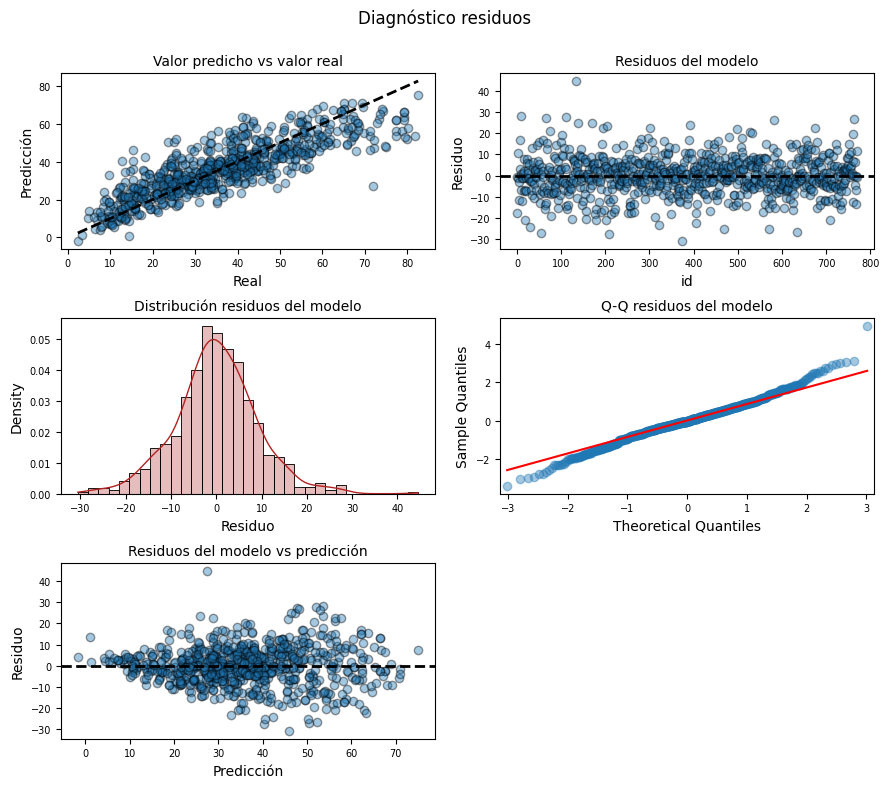

In [ ]:
## Residuos del modelo
residuos = modelo_ols.resid

## Prediciones en conjunto entrenamiento
prediccion_train = modelo_ols.predict(X_ols)

## ------------------------------------------
## Representación 
## ------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data     = residuos,
    stat     = "density",
    kde      = True,
    line_kws = {'linewidth': 1},
    color    = "firebrick",
    alpha    = 0.3,
    ax       = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12);

P-valor <0.05. Por lo tanto,  no aceptamos la hipótesis nula de que los residuos se distribuyen normalmente.

In [ ]:
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")



Test Shapiro-Wilk: estadístico = 0.9886651810377391, p-value = 1.1073597272191607e-05


#### Homocedasticidad

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

resid = modelo_ols.resid
exog  = modelo_ols.model.exog   # X con la constante tal cual se usó en el ajuste

lm, lm_p, fval, f_p = het_breuschpagan(resid, exog)
print(f"Breusch–Pagan: LM={lm:.3f}, p={lm_p:.4g} | F={fval:.3f}, p={f_p:.4g}")

# Interpretación rápida
if (lm_p < 0.05) or (f_p < 0.05):
    print("Rechazamos H0: hay evidencia de heterocedasticidad.")
else:
    print("No rechazamos H0: no hay evidencia suficiente de heterocedasticidad.")


Breusch–Pagan: LM=46.089, p=8.401e-08 | F=6.930, p=5.143e-08
Rechazamos H0: hay evidencia de heterocedasticidad.


#### Comprobación de colinealidad entre las variables predictoras

In [ ]:
cols = predictores.columns.tolist()  # lista de columnas
X_vif = sm.add_constant(X_train_s[cols], has_constant='add')  # misma escala y constante

vif_df = pd.DataFrame({
    'variable': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_df = vif_df[~vif_df['variable'].isin(['const','intercept'])].sort_values('VIF', ascending=False)
vif_df


variable       VIF
5       x5  2.005576
3       x3  1.795532
4       x4  1.770886
1       x1  1.515058
2       x2  1.416248
6       x7  1.405203
7       x8  1.027800

Conclusión VIF. No se observan problemas de multicolinealidad: todos los VIF están entre 1.02 y 2.08, por debajo del umbral conservador de 5 (y muy lejos de 10). Las tolerancias (1/VIF) quedan entre 0.48 y 0.98 (> 0.20). Por tanto, las estimaciones de los coeficientes son estables y su interpretación individual es fiable; no es necesario eliminar ni combinar variables por colinealidad en el modelo actual. (Si incorporas términos cuadráticos o interacciones, vuelve a reevaluar los VIF.)